In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

import warnings 
warnings.filterwarnings('ignore')

In [9]:
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

In [10]:
df = pd.read_csv("bacteria_train.csv")

In [11]:
df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [12]:
x, y  = df[['Spreading_factor']], df['Perc_population']

In [13]:
maxdeg = 4
x_poly = PolynomialFeatures(degree= maxdeg, include_bias=False).fit_transform(x)
x_poly = normalize(x_poly, axis=0)

In [14]:
alpha_list = np.linspace(10,120,1000)
len(alpha_list)

1000

In [15]:
coeff_list = []

for a in alpha_list:

    ridge_reg = Ridge(alpha= a)

    ridge_reg.fit(x_poly, y)
    
    coeff_list.append(ridge_reg.coef_)

In [16]:
ridge_trend = np.array(coeff_list).T

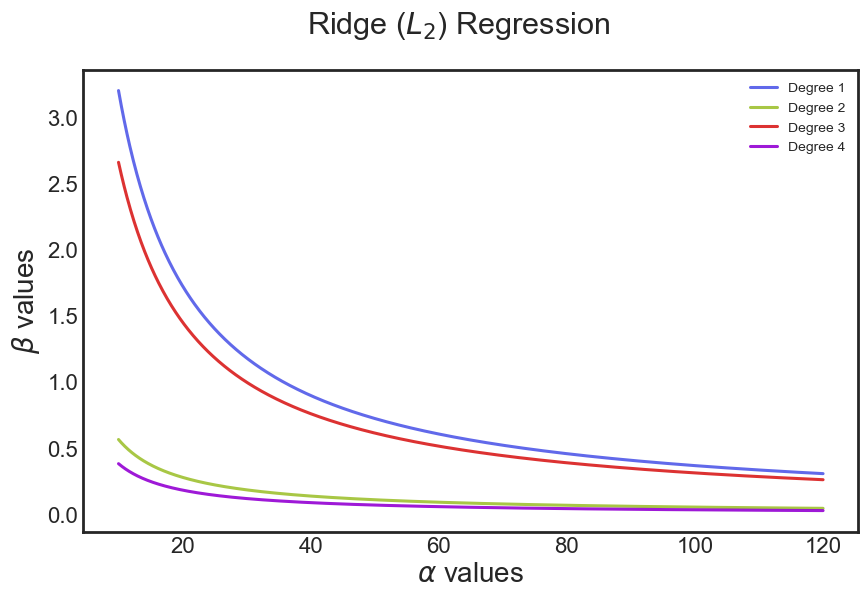

In [17]:
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(ridge_trend[i]), color=colors[i],
            alpha = 0.9, label = f'Degree {i+1}', lw=2.2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Ridge ($L_2$) Regression');

In [18]:
alpha_list = np.linspace(1e-4,1e-1,1000)
len(alpha_list)

1000

In [19]:
coeff_list = []

for a in alpha_list:

    lasso_reg = Lasso(alpha=a,max_iter=250000)
    
    lasso_reg.fit(x_poly, y)
    
    coeff_list.append(lasso_reg.coef_)

In [20]:
lasso_trend = np.array(coeff_list).T

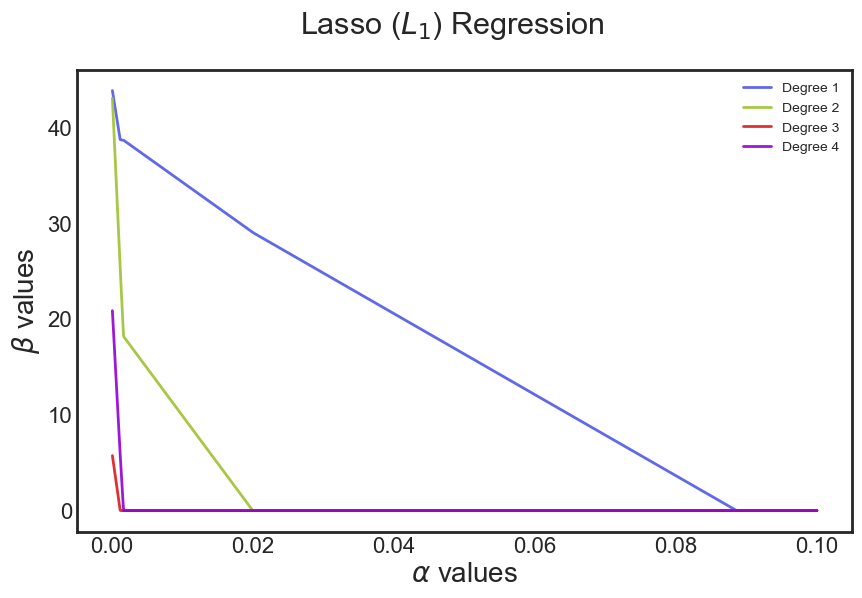

In [21]:
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(lasso_trend[i]), color=colors[i], 
            alpha = 0.9, label = f'Degree {i+1}', lw=2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Lasso ($L_1$) Regression');

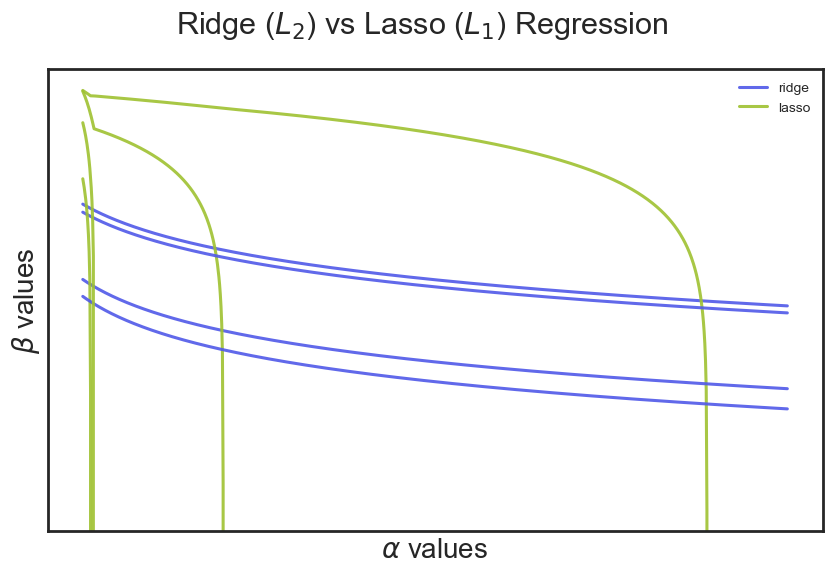

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    if i == 0:
        labels = ["ridge", "lasso"]
    else:
        labels = [None, None]
    ax.semilogy(alpha_list, np.abs(ridge_trend[i]), color=colors[0],
                alpha = 0.9, lw=2.2, label = labels[0])
    ax.semilogy(alpha_list, np.abs(lasso_trend[i]), color=colors[1],
                alpha = 0.9, lw=2.2, label = labels[1])
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)
    ax.tick_params(axis='both',which='both',bottom=False,top=False,
                labelbottom=False,labelleft=False)

fig.suptitle(r'Ridge ($L_2$) vs Lasso ($L_1$) Regression');